# (E1)가위바위보 분류기


##### 작업을 위해 필요한 패키지를 불러온 코드

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os,glob
from PIL import Image
import matplotlib.pyplot as plt

###### load_data라고 정의한 함수
데이터의 수와 이미지 경로를 넣으면 경로에있는 가위바위보 파일에 있는 이미지를 numpy행렬에 넣는다

In [17]:
def load_data(number_of_data,img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터(x_lable)의 이미지 개수는",idx,"입니다.")
    return imgs, labels


이미지 경로를 입력하고 트레인용과 테스트용을 load_data함수로 입력하였다. 정규화를 위해 x열은 255로 나누어 주었다. 

In [18]:
image_dir_path = os.getenv("HOME") + "/Downloads/here/train"
image_dir_path_test = os.getenv("HOME") + "/Downloads/rock-scissor-paper/test(real)"
(x_train, y_train)=load_data(4037,image_dir_path)
(x_test,y_test)=load_data(300,image_dir_path_test)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 수로 정규화
x_test_norm = x_test/255.0
print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

데이터(x_lable)의 이미지 개수는 4037 입니다.
데이터(x_lable)의 이미지 개수는 300 입니다.
x_train shape: (4037, 28, 28, 3)
x_test shape: (300, 28, 28, 3)
y_train shape: (4037,)
y_test shape: (300,)


모델의 모양을 잡았다. 아직 풀링과 평탄화를 모르고 추가적으로 층을 늘리기엔 하이퍼파라미터가 증가할것같아 lms의 본 모습에 충실하기로 하였다.  
여기서 하이퍼파라미터를 첫번째 레이어의 이미지 포인트와 두번째 레이어의 이미지 포인트 그리고 밀도(복잡도)를 잡았다. 최종적으로 선정된 모델은 아래와 같다

In [19]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(192, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               307392    
_________________________________________________________________
dense_3 (Dense)              (

Epoch 1/18
127/127 [==============================] - 1s 5ms/step - loss: 0.9925 - accuracy: 0.4835
Epoch 2/18
127/127 [==============================] - 1s 5ms/step - loss: 0.6536 - accuracy: 0.7119
Epoch 3/18
127/127 [==============================] - 1s 5ms/step - loss: 0.3991 - accuracy: 0.8551
Epoch 4/18
127/127 [==============================] - 1s 5ms/step - loss: 0.2747 - accuracy: 0.9036
Epoch 5/18
127/127 [==============================] - 1s 5ms/step - loss: 0.1577 - accuracy: 0.9507
Epoch 6/18
127/127 [==============================] - 1s 5ms/step - loss: 0.0836 - accuracy: 0.9787
Epoch 7/18
127/127 [==============================] - 1s 5ms/step - loss: 0.0528 - accuracy: 0.9876
Epoch 8/18
127/127 [==============================] - 1s 5ms/step - loss: 0.0555 - accuracy: 0.9851
Epoch 9/18
127/127 [==============================] - 1s 5ms/step - loss: 0.0225 - accuracy: 0.9965
Epoch 10/18
127/127 [==============================] - 1s 5ms/step - loss: 0.0335 - accuracy: 0.9918

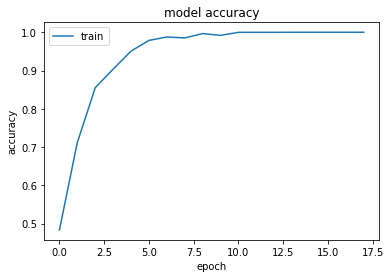

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=18)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.3647 - accuracy: 0.7233
test_loss: 2.364651918411255 
test_accuracy: 0.7233333587646484


### 하이퍼파라미터 결정 짓기
테스트 정확도가 처음 모델에서는 40퍼정도가 나왔다. 트레인은 90대 중후반으로 정확도를 60퍼 이상으로 올리고 싶어서 방법을 고안하다가 방향성을 두가지로 잡았찰 하나는 데이터의 수량을 늘리는 것과 하나는 모델의 레이어의 특성을 변경하여 정확도를 올리고 싶었다.
처음 모델은 트레인 약 2700개 테스트(벨리데이션) 300개 레이어1은 16 2는 32 dense는 32 epoch 10  정확도 약 40이 나왔다.  
다음 모델은 트레인 약 3000개 테스트(벨리데이션) 300개로 레이어,dense epoch은 표로 표현하였다.

|**레 이 어 1**|**레 이 어 2**|**d e n s e**|**정 확 도 (e p o c h ( 8 ,12 ,16 ) )**|
|:---:|:---:|:---:|:---:|
|8 |16|16|(43,40,50)|
|8 |16|32|(40,57,52)|
|**8** |**16**|**64**|**(58,57,49)**|
|**8** |**16**|**128**|**(55,56,44)**|
|16|32|16|(57,57,59)|
|16|32|32|(48,53,52)|
|16|32|64|(54,51,52)|
|**16**|**32**|**128**|**(63,66,49)**|
|32|64|16|(50,42,51)|
|32|64|32|(42,44,55)|
|32|64|64|(50,48,57)|
|**32**|**64**|**128**|**(61,67,55)**|


여기까지 봤을 때 에폭수에 따른 변화를 보면 에폭수가 늘어남에 따라 일반적으로 정확도가 올라가야한다.이 실험의 에폭의 크기 변화가 크지않아 정확하지는 않지만 8->12->16에서 변화하며 중간에 줄었다가 다시 커지는 것이 있고 변화가 거의 없는 것이 있고, 커졌다가 작아지는 것이 있다.  
CFD를 조금 배우다가 온 견해로는 작아지다 커진 것은 작아질때까지의 에폭은 아직 불안정한 상태로 정확도의 가치가 없다.또한 에폭16일때의 정확도가 가치가 있다 없다 말할수가 없어진다.하지만 떨어졌을 때의 크기를 보면 크지가 않아 오차로 볼 수도 있다.그 이유가 포인트가 3개밖데 없어서인데 여기서 포인트를 늘려 전체적으로 다시 보는 것보다 저기 모델들에서 추려 트레인수를 늘려 다시 실험을 진행할 때 줄었다 커진 특성들을 다시 실험해야할 것이다.  
변화가 없는 것은 이미 안정적인 상태로 돌입하였고 더 에폭수를 늘려봐야 과적합만 발생될수있다. 또 다른 경우를 생각해보면 이미 과적합이 되어 낮을 수 있지만 다른 데이터와 비교하였을 때 과적합으로 인해 떨어진 수치로는 안보여 전자의 경우만 생각하면 될 것이다.  
올라가다 떨어진 것은 두가지로 볼 수 있다. 한가지는 과적합에 의해 수치가 떨어진 것으로 볼 수 있고 한가지는 아직 에폭수가 부족하여 불안정한 상태일 수 있다.  
과적합은 트레인할 때 에폭수를 보면서 유추 할 수 있기에 기록은 안되어 있지만 과적합에 대한 것은 테스트 하기전 인지 할 수 있으므로 저기 모델들 중에 정확도의 가치가 있고 높은 것을 추렸다.
1. 레이어1은 8 레이어2는 16 밀도는 64 에폭수는 12이하 최고 58
2. 레이어1은 8 레이어2는 16 밀도는128 에폭수는 12이하 최고 56
3. 레이어1은16 레이어2는 32 밀도는128 에폭수는 12이하 최고 66
4. 레이어1은32 레이어2는 64 밀도는128 에폭수는 12이하 최고 67
여기서 
밀도가 커지면 커질 수록 최고의 값을 가지는 것을 확인하였다. 하지만 1,2를 비교하였을 때 밀도가 어느 정도 커지면 의미가 없어지고 계산속도만 느려지는 것을 알 수 있다. 또한 에폭수가 16일 때 다 과적합으로 판단되었다. 3,4번은 밀도가 더 커지면 정화도가 올라갈 것으로 보여진다. 
또 3,4를 보면 모델의 파람 수는 약 두배이상 차이 나지만 정확도는 차이가 미미하다. 빠르고 정확한 모델로 순위를 매기자면 3>4>1>2로 판단된다.
사실 이미 목표치인 60퍼를 넘겨 괜찮다고 생각할 수 있지만 인간의 욕심은 끝이 없고 저것이 실제 테스트에서도 60퍼 이상이 나올 지 확신이 안들기 때문에 확실하게 하기위해 데이터 수를 늘리고 진행한다.

트레인 약 4000개 테스트(벨리데이션) 300개  
1. 57%나옴 -> 에폭수가 부족해보여 에폭수를 늘림(12->18) -> 72%
2. 55%나옴 -> 에폭수가 부족해보여 에폭수를 늘림(12->18) -> 64%
3. 64%나옴 -> 밀도와 에폭수를 키워봄(128 ->192 ,12->18)->72%
4. **71%나옴 -> 밀도와 에폭수를 키워봄(128 ->192 ,12->18)->72%**

최종 모델로 트레인 4번조건으로 선택하였다.
진짜 테스트용 데이터로 실험했을때 최종 정확도가 **72.30%** 으로 나왔다 
 최종테스트에서는 가진 데이터에서 통합후 정해놓지 않고 아예 새로운 사람의 데이터를 다운받아 진행하여 완전히 새로 본 데이터로 진행하였다. 만약 미리 여러 사람의 데이터를 다운 받아 섞어 놓은 후에 일부를 테스트 용으로 한다면 데이터 수집을 위해 사용한 웹에서 사진을 찍을 때 프레임이 높을 경우 같은 사진이 2장이상이 있을 수 있어 테스트와 트레인에 같은 사진이 섞여 실제 성능값을 알 수 없기 때문이다.
#### 부족한 점
아직 벨리데이션의 정의가 정확히 이해를 못해서 그런가 팀원들의 밸리데이션은 에폭단계당 같이 뭔가 계산을 돌려서 하는데 내가 아는 것은 벨리데이션으로 하이퍼파라미터를 정하는 것으로 이해하였다. 아직 E2를 건들지 못했는데 E2에서 나온다고 하니 거기서 좀더 알아봐야겠다.

### 아래 작업은 데이터 전처리 위한 데이터 모으기 위한 작기


In [216]:
def renaming(path,path1,a):
    #데이터의 이름이 겹처 한파일로 모으기 위해 이름을 바꾸는 작업 ,a= 바꾼 파일 수 path= 파일위치 path1=바꾸고 싶은 파일 위치
    
    i=0
    j=0
    k=0
    for filename in os.listdir(path+'/paper'):
        os.rename(path+'/paper/'+filename, path1+'/paper/'+str(a)+'m'+str(i)+'.jpg')
        i=i+1
    
    for filename1 in os.listdir(path+'/rock'):
        os.rename(path+'/rock/'+filename1, path1+'/rock/'+str(a)+'m'+str(j)+'.jpg')
        j=j+1
        
    for filename2 in os.listdir(path+'/scissor'):
        os.rename(path+'/scissor/'+filename2, path1+'/scissor/'+str(a)+'m'+str(k)+'.jpg')
        k=k+1    

In [202]:
# 데이터 이름 변경 및 파일 위치 통합
img_path = os.getenv("HOME") + "/Downloads/here/11"
img_path1 = os.getenv("HOME") + "/Downloads/here/train"
renaming(img_path,img_path1,11)

In [217]:
# 데이터 이름 최종 통합
img_path = os.getenv("HOME") + "/Downloads/here/train"
img_path1 = os.getenv("HOME") + "/Downloads/here/train"
renaming(img_path,img_path1,0)